# 課題3 Auto MPT Datasetを用いた線形重回帰の考察

In [1]:
# -*-coding:utf-8 -*-
import pandas as pd 
import numpy as np
from algorithm import MultipleLinearRegression #今回実装した線形重回帰のライブラリ
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
'''
データセットの準備
データにカラムを割り当て、floatとして格納する。
車の名前は分類に関係ないのでデータセットから外した。
'''
path = './datasets/auto-mpg.data-original'

with open(path) as f:
    txt = f.readlines()

data = list()
    
for i,line in enumerate(txt):
    sub = line.split()
    if 'NA' in sub:
        continue
    sub = sub[:8]
    for j,num in enumerate(sub):
        sub[j] = float(num)
    data.append(sub)
    
columns = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
    'origin',
]

dataframe = pd.DataFrame(data,columns = columns)

In [3]:
dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [4]:
'''
まずweightとhorsepowerを予測モデルに利用する。
mpgを予測するためtargetとして格納する。
'''

data = np.array(dataframe.loc[:,['weight','horsepower']])
target = np.array(dataframe.loc[:,'mpg'])

In [5]:
'''
trainデータとtestデータに分割する。
'''
from sklearn.model_selection import train_test_split

x_train,x_test,t_train,t_test = train_test_split(
    data,
    target,
    random_state = 0
)

In [6]:
'''
回帰モデルの形成
'''
rgr = MultipleLinearRegression()
rgr.fit(x_train,t_train)

In [7]:
'''
精度の指標としての決定係数の計算
'''
print('train_set score : {},\ntest_set score : {}'.format(
    rgr.score(x_train,t_train),
    rgr.score(x_test,t_test)
))

train_set score : 0.7143995090356767,
test_set score : 0.679535363993828


### ある程度の精度が達成されたため回帰モデルとして成立していることが考えられる。

正解データ


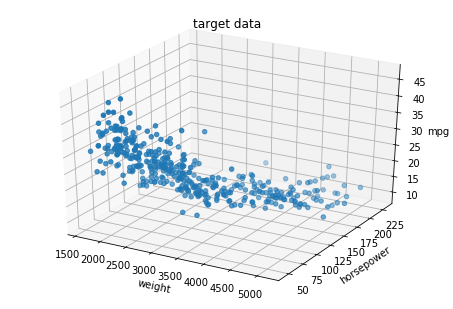

予測データ


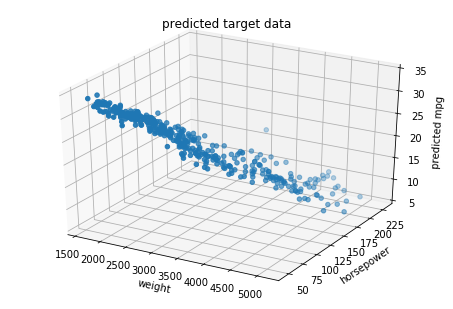

In [8]:
'''
正解データと予測データの三次元プロット
'''

print('正解データ')
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('weight')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.scatter(data[:,0],
           data[:,1],
           target,
          )
plt.title("target data")
plt.show()

print('予測データ')
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('weight')
ax.set_ylabel('horsepower')
ax.set_zlabel('predicted mpg')
ax.scatter(data[:,0],
           data[:,1],
           rgr.predict(data),
          )
plt.title("predicted target data")
plt.show()

### 以上のグラフから回帰モデルはある程度特徴を掴んだ形状をしているが、次元が小さくモデルがシンプルなため予測されたデータの形状もまとまりのあるものとなっている。

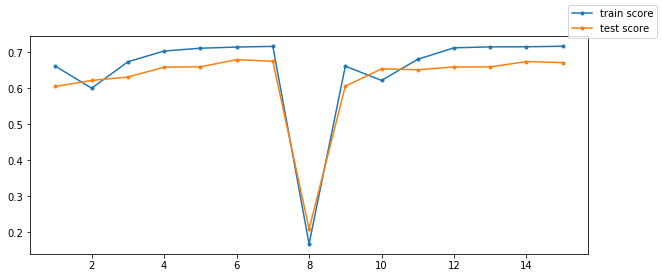

In [9]:
'''
用いるデータを増やす。
回帰問題として用いやすいcontinuousデータを用いる。
'''

continuous = np.array([ #continuousなデータをまとめる
    'displacement',
    'horsepower',
    'weight',
    'acceleration'
])

train_score = list()
test_score = list()



for i in range(1,1<<4): #bit全探索
    flags = list()
    for j in range(4):
        if i>>j & 1:
            flags.append(True)
        else:
            flags.append(False)
    mask = np.array(flags)
    data = np.array(dataframe.loc[:,continuous[mask]])
    target = np.array(dataframe.loc[:,'mpg'])
    x_train,x_test,t_train,t_test = train_test_split(
        data,
        target,
        random_state = 0
    )
    rgr = MultipleLinearRegression()
    rgr.fit(x_train,t_train)
    train_score.append(rgr.score(x_train,t_train))
    test_score.append(rgr.score(x_test,t_test))
    
fig = plt.figure(figsize = (10,4))
x = np.linspace(1,(1<<4)-1,(1<<4)-1)
ax = fig.add_subplot(111)
#ax.set_ylim([0.4,0.8])
ax.plot(x,train_score,marker = '.',label = 'train score')
ax.plot(x,test_score,marker = '.',label = 'test score')
fig.legend()